This notebook discusses NRLEE nucleosynthesis.  Here is the anatomy of a NRLEE:
    
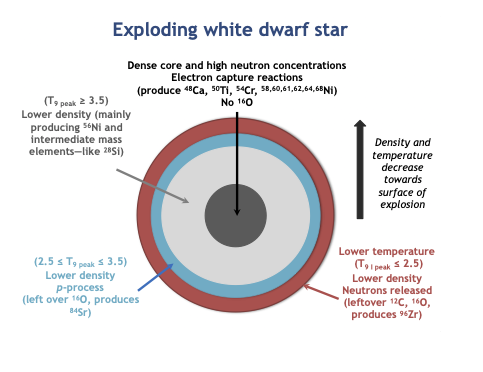

This notebook explores NRLEE nucleosynthesis via output from a series of single-zone network calculations.  To study this nucleosynthesis, first import the necessary packages

In [1]:
import sys
!{sys.executable} -m pip install --quiet wnutils
!{sys.executable} -m pip install --quiet urllib3

The next step is to import the package to check for and retrieve the data:

In [2]:
import os.path
from os import path
import urllib.request

The following code block next checks whether the data exist locally, and, if not, retrieve and unpack them.

In [3]:
if not path.exists('output'):
    url = 'http://nucnet-tools.sourceforge.net/data_pub/nrlee/2021-01-08/output.tar.gz'
    filename = 'output.tar.gz'
    urllib.request.urlretrieve(url,filename)
    !tar zxvf output.tar.gz

This notebook uses [wnutils](https://wnutils.readthedocs.io) to analyze the nucleosyntheis [XML](https://www.w3.org/TR/REC-xml/) output, so we import that package.

In [4]:
import wnutils.xml as wx

The next step is the read in the data from the various calculations.

In [5]:
h = wx.Xml('output/h_burn/out.xml')
he = wx.Xml('output/he_burn/out.xml')
sproc = wx.Xml('output/s-process/out.xml')
exp_tau = wx.Xml('output/s-process/exp_tau.xml')
outer = wx.Xml('output/outer_layers/full.xml')
inner = wx.Xml('output/inner_layers/full.xml')

The first nucleosynthesis stage in the star's life was hydrogen burning.  This was modeled at constant temperature and density with initial solar composition, as given by [Lodders](https://ui.adsabs.harvard.edu/abs/2003ApJ...591.1220L/abstract).  The conditions are printed in the next cell.

In [15]:
props = h.get_properties_as_floats(['time', 't9', 'rho'])
print('For the calculation, the duration, temperature, and density were:')
print('   time (Gyr) = {0:.2e}'.format(props['time'][len(props['time'])-1] / 3.15e17))
print('   T (K) = {:.2e}'.format(props['t9'][len(props['t9'])-1] * 1.e9))
print('   mass density (g/cc) = {:.2e}'.format(props['rho'][len(props['rho'])-1]))

For the calculation, the duration, temperature, and density were:
   time (Gyr) = 3.00e+00
   T (K) = 2.00e+07
   mass density (g/cc) = 2.00e+01


In hydrogen burning, the initial $^1$H burns to $^4$He.  For stars greater than about 1.3 times the mass of the Sun, this occurs via [CNO cycling](https://en.wikipedia.org/wiki/CNO_cycle).

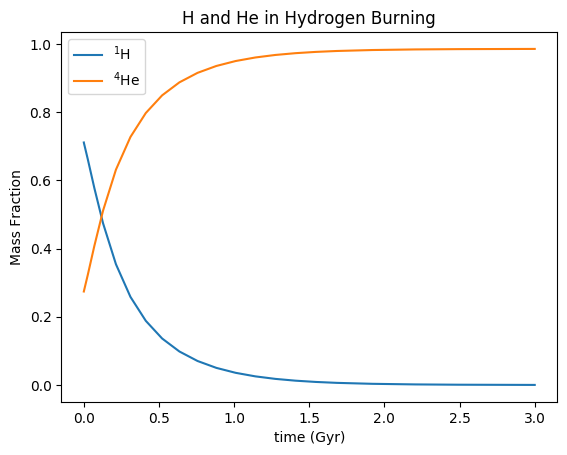

In [16]:
species = ['h1', 'he4']
h.plot_mass_fractions_vs_property('time', species, xfactor = 3.15e17, xlabel='time (Gyr)', use_latex_names = True, title='H and He in Hydrogen Burning')

Once the star exhausted its core hydrogen, it contracted, heated up, and ignited helium burning.  For the present calculation, this burning stage was again modeled with constant temperature and density, and the conditions are printed in the next cell.

In [17]:
props = he.get_properties_as_floats(['time', 't9', 'rho'])
print('For the calculation, the duration, temperature, and density were:')
print('   time (yr) = {0:.2e}'.format(props['time'][len(props['time'])-1] / 3.15e7))
print('   T (K) = {:.2e}'.format(props['t9'][len(props['t9'])-1] * 1.e9))
print('   mass density (g/cc) = {:.2e}'.format(props['rho'][len(props['rho'])-1]))

For the calculation, the duration, temperature, and density were:
   time (yr) = 2.00e+05
   T (K) = 2.00e+08
   mass density (g/cc) = 1.00e+03


Helium burning occurs via the [triple-alpha process](https://en.wikipedia.org/wiki/Triple-alpha_process).  It creates $^{12}$C and $^{16}$O from the initial $^4$He: 

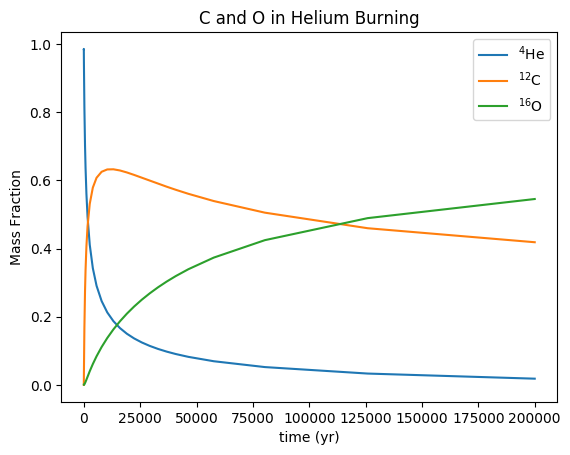

In [18]:
species = ['he4', 'c12', 'o16']
he.plot_mass_fractions_vs_property('time', species, xfactor = 3.15e7, xlabel='time (yr)', use_latex_names = True, title = 'C and O in Helium Burning')

Helium burning creates a carbon/oxygen core in the star.  If the core becomes [degenerate](https://en.wikipedia.org/wiki/Degenerate_matter#Degenerate_gases) at this stage, it is able to sustain itself against further gravitational contraction without further nuclear burning.  The reason is that radiation loss normally leads to a loss of energy from the core, which means the pressure decreases.  Nuclear burning releases energy and maintains the necessary pressure.  For degenerate matter, however, the pressure is simply maintained by the fact that no two electrons can exist in the same quantum mechanical state (the [Pauli exclusion principle](https://en.wikipedia.org/wiki/Pauli_exclusion_principle).  At high density, this fact allows there to be strong pressure even at low temperature.

Outside the carbon/oxygen core, helium-rich matter exists and can undergo helium burning.  The ashes of this burning ($^{12}$C and $^{16}$O) settle onto the core and increase the core's mass.  The burning is in fact a complicated and alternating interplay of shell helium burning and shell hydrogen burning outside the helium burning, with mixing occurring between the various shell burnings.  This is the burning that occurs during the star's life on the [asymptotic giant branch](https://en.wikipedia.org/wiki/Asymptotic_giant_branch).  During this phase, [s-processing](https://en.wikipedia.org/wiki/S-process) can occur.

The present calculation modeled s-process nucleosynthesis by running the ashes of helium burning at constant temperature, density, and neutron density, which are printed in the next cell.

In [19]:
props = sproc.get_properties_as_floats(['time','t9', 'rho'])
x_n = sproc.get_mass_fractions(['n'])['n']
n_n = x_n[len(x_n)-1] * props['rho'][len(props['rho'])-1] * 6.022e23
print('For the calculation, the duration, temperature, mass density, and neutron density were:')
print('   time (yr) = {0:.2e}'.format(props['time'][len(props['time'])-1] / 3.15e7))
print('   T (K) = {:.2e}'.format(props['t9'][len(props['t9'])-1] * 1.e9))
print('   mass density (g/cc) = {:.2e}'.format(props['rho'][len(props['rho'])-1]))
print('   neutron density (per cc) = {:.2e}'.format(n_n))

For the calculation, the duration, temperature, mass density, and neutron density were:
   time (yr) = 1.00e+05
   T (K) = 2.50e+08
   mass density (g/cc) = 1.00e+03
   neutron density (per cc) = 1.00e+08


Plot s-process abundances (exponential distribution with $\tau_0 = 0.3\ mb^{-1}$).

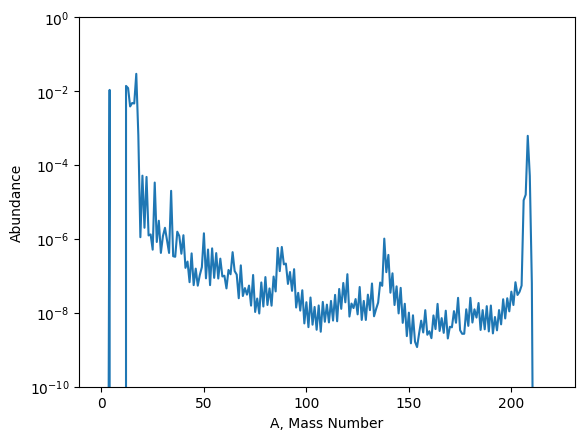

In [21]:
sproc.plot_abundances_vs_nucleon_number(ylim=[1.e-10,1], xlabel='A, Mass Number', ylabel='Abundance', yscale='log')

Plot outer layers.

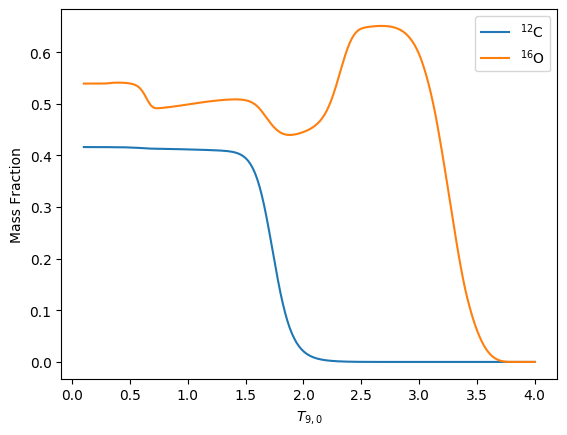

In [12]:
species = ['c12', 'o16']
outer.plot_mass_fractions_vs_property('t9_0', species, xlabel='$T_{9,0}$', use_latex_names=True)

Plot other species in outer layers.

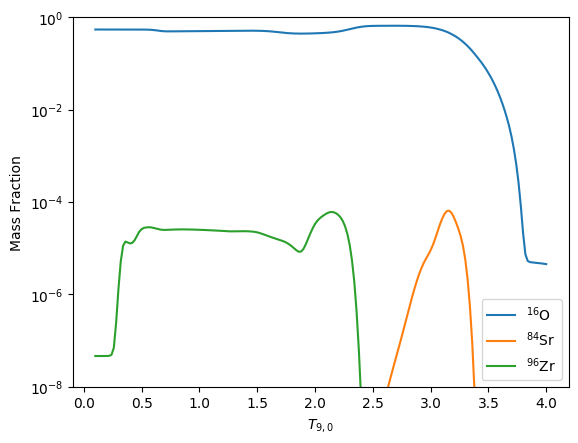

In [13]:
species = ['o16', 'sr84', 'zr96']
outer.plot_mass_fractions_vs_property('t9_0', species, xlabel='$T_{9,0}$', use_latex_names=True, yscale='log', ylim=[1.e-8,1])

Plot inner layers.

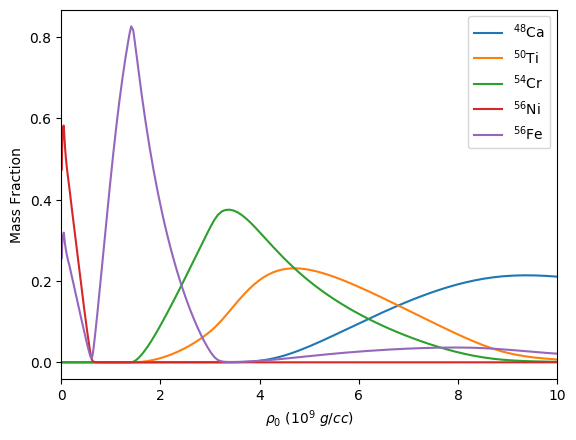

In [14]:
species = ['ca48', 'ti50', 'cr54', 'ni56', 'fe56']
inner.plot_mass_fractions_vs_property('rho_0', species, xlabel='$\\rho_0\\ (10^9\\ g/cc)$', use_latex_names=True, xlim=[0,10],xfactor=1.e9)